# Correlation between Two Variable

Learning goals:
* Understand independent (x) versus target (y) variables.
* Know how to visualize relationships between x and a continuous target variable y.
    * When x is continuous.
    * When x is categorical/discrete.

# Correlation is not causation

Linear correlation.

Positive correlation.

Negative correlation.

No correlation.

Correlation does not necessarily mean causation.

# Iris dataset

Is there a correlation between petal width and petal length?

In [1]:
import pandas, seaborn

In [2]:
iris = pandas.read_csv('../Datasets/iris.csv')

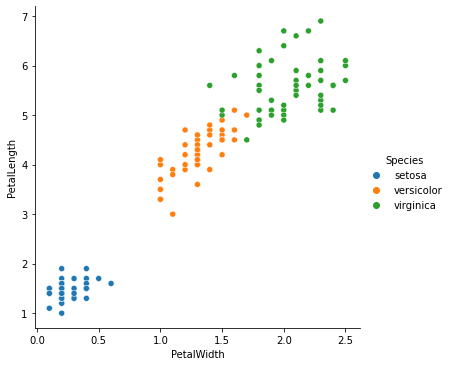

In [3]:
seaborn.relplot(data=iris, x='PetalWidth', y='PetalLength', hue='Species')

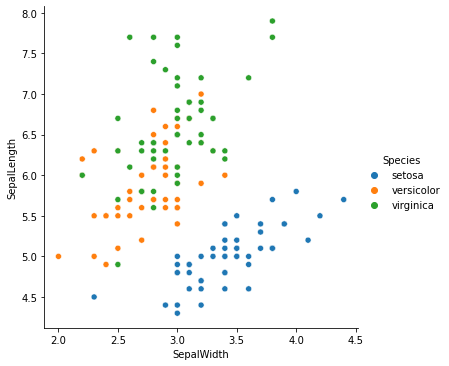

In [4]:
seaborn.relplot(data=iris, x='SepalWidth', y='SepalLength', hue='Species')

There is a positive correlation between petal width and petal length.

Correlation is about the dependency between two things, or two groups.

Correlation can be quantified.

The dependency can be linear or non-linear.

# Car Crash dataset

Which state has the highest speeding rate?

What is the relationship between speeding and alcohol?

What is the relationship between speeding and ins_premium?

In [5]:
crash = pandas.read_csv('../Datasets/car_crashes.csv')

In [6]:
crash.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
crash['abbrev'].nunique()

51

In [8]:
crash.sort_values(by = ['speeding'], ascending = False).iloc[0]

total               17.5
speeding            9.45
alcohol            7.175
not_distracted     14.35
no_previous       15.225
ins_premium       861.18
ins_losses        120.92
abbrev                HI
Name: 11, dtype: object

In [9]:
crash.nlargest(1, 'speeding')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
11,17.5,9.45,7.175,14.35,15.225,861.18,120.92,HI


In [13]:
crash.loc[crash['speeding'] == crash['speeding'].max(), ['abbrev', 'speeding']]

,abbrev,speeding
11,HI,9.45


In [14]:
crash['speeding'].max()

9.45

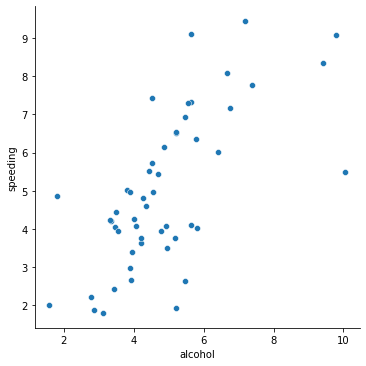

In [16]:
import seaborn as sns
sns.relplot(data = crash, x = 'alcohol', y = 'speeding')

In [10]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression

X = crash[['alcohol']]
y = crash['speeding']
model = LinearRegression()
validator = ShuffleSplit(n_splits = 200)
results = cross_validate(model, X, y, cv = validator)
print(results['test_score'].mean().round(2), results['test_score'].std().round(2))

0.04 1.11


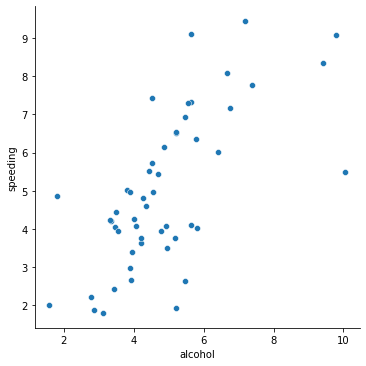

In [23]:
seaborn.relplot(data=crash, x='alcohol', y='speeding')

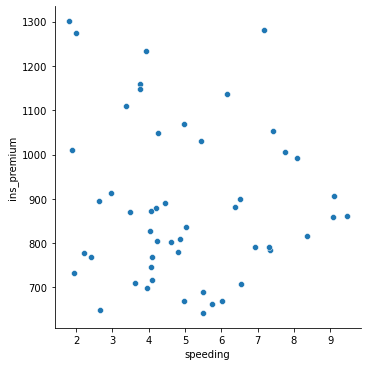

In [24]:
seaborn.relplot(data=crash, x='speeding', y='ins_premium')

# Tips dataset

Is there a correlation between tip amounts and gender?

Is there a correlation between smoking and tip amounts?

Is there a correlation between weekdays and tip amounts?

In [25]:
tips = pandas.read_csv('../Datasets/tips.csv')

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


c:\users\msaha1\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


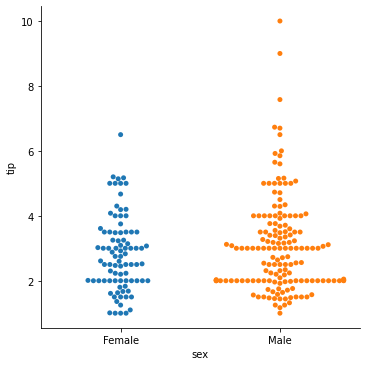

In [26]:
sns.catplot(data = tips, x = 'sex', y = 'tip', kind = 'swarm')

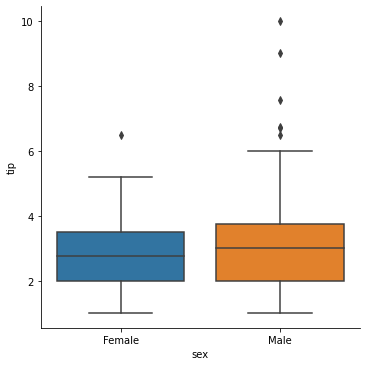

In [28]:
sns.catplot(data = tips, x = 'sex', y = 'tip', kind = 'box')

### Questions:
+ What is the distribution of total bills?
+ Is there a relationship between tip amounts and gender?
+ On which days do people give more tips?
+ Is there a relationship between tip amounts and smoking?
+ Do they smoke during work?  We won't be to get the answer from this data.
+ Is this "smoke" variable about servers or customers?
+ What is size?

Is this data about servers or customers?  Answer: customers.


c:\users\msaha1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

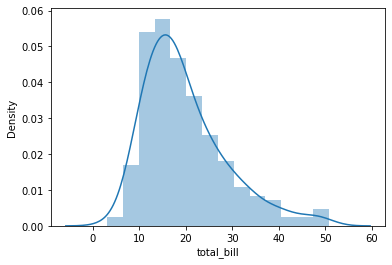

In [30]:
sns.distplot(tips['total_bill'])

In [31]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

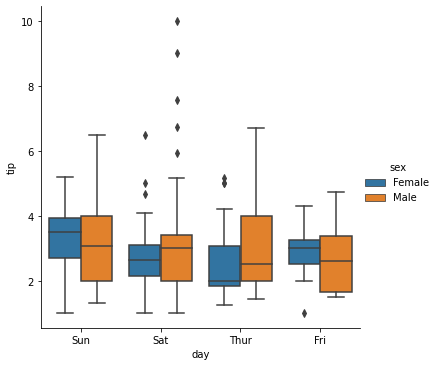

In [34]:
sns.catplot(data = tips, x = 'day', y = 'tip', kind = 'box', hue = 'sex')

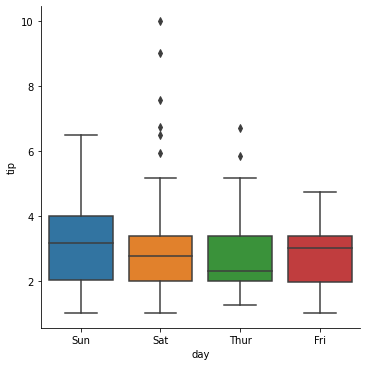

In [35]:
sns.catplot(data = tips, x = 'day', y = 'tip', kind = 'box')

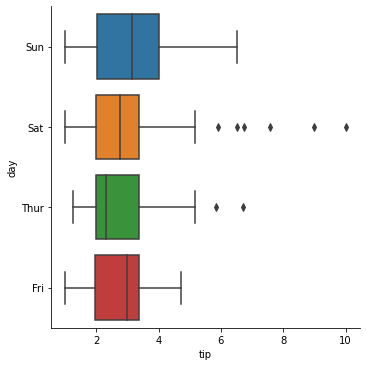

In [37]:
sns.catplot(data = tips, y = 'day', x = 'tip', kind = 'box')

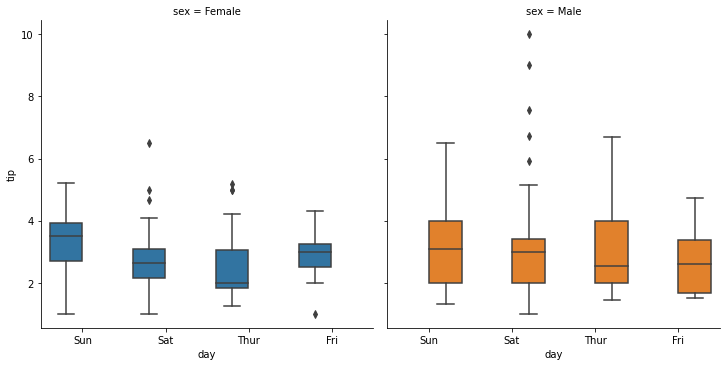

In [38]:
sns.catplot(data = tips, x = 'day', y = 'tip', kind = 'box', hue = 'sex', col = 'sex')

In [39]:
tips.groupby('day')['tip'].agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
day,,,,
Fri,2.734737,3.000,1.00,4.73
Sat,2.993103,2.750,1.00,10.00
Sun,3.255132,3.150,1.01,6.50
Thur,2.771452,2.305,1.25,6.70


In [12]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [13]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [15]:
tips.sex.value_counts(1).round(2)

Male      0.64
Female    0.36
Name: sex, dtype: float64

In [17]:
tips.day.value_counts(1)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [18]:
tips.time.value_counts(1)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [41]:
tips['time'].value_counts(normalize = True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# What's average total bill?

In [19]:
tips.total_bill.mean()

19.785942622950824

In [20]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [21]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# What's tips / total_bill?

In [27]:
(100*(tips.tip / tips.total_bill)).round(2)

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
239    20.39
240     7.36
241     8.82
242     9.82
243    15.97
Length: 244, dtype: float64

In [24]:
1.01/16.99

0.05944673337257211

In [34]:
round((100*tips.tip / tips.total_bill).mean(),2)

16.08

On average, tip amounts are about 16% of the total bill.

# What's the distribution of tip amounts based on gender?

#### Do men pay tip more or less than women?

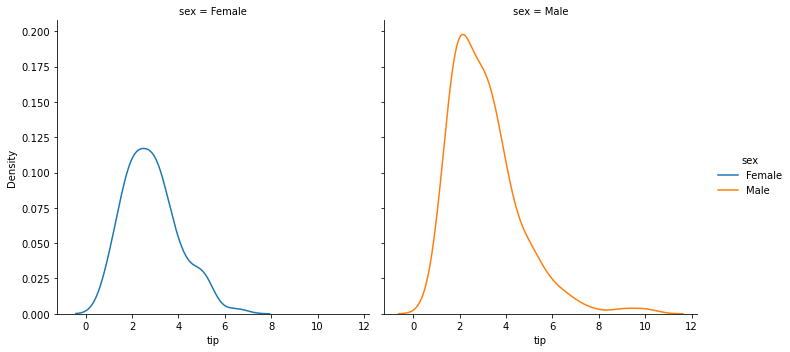

In [46]:
sns.displot(data = tips, x = 'tip', kind = 'kde', hue = 'sex', col = 'sex')

In [49]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [50]:
tips['tip_by_total_bill'] = 100*tips.tip / tips.total_bill

In [51]:
tips['tip_by_total_bill'].mean()

16.080258172250463

In [52]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_by_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [53]:
tips.groupby('sex').mean().round(2)

,total_bill,tip,size,tip_by_total_bill
sex,,,,
Female,18.06,2.83,2.46,16.65
Male,20.74,3.09,2.63,15.77


# Do people tip more (in terms of percentage) when they have larger bills?

In [54]:
tips[['total_bill', 'tip_by_total_bill']].sort_values(by='total_bill')

,total_bill,tip_by_total_bill
67,3.07,32.573290
92,5.75,17.391304
111,7.25,13.793103
172,7.25,71.034483
149,7.51,26.631158
...,...,...
182,45.35,7.717751
156,48.17,10.379905
59,48.27,13.942407
212,48.33,18.621974


In [55]:
tips.nlargest(10, 'total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_by_total_bill
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
182,45.35,3.50,Male,Yes,Sun,Dinner,3,7.717751
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341
197,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237
142,41.19,5.00,Male,No,Thur,Lunch,5,12.138869
184,40.55,3.00,Male,Yes,Sun,Dinner,2,7.398274
95,40.17,4.73,Male,Yes,Fri,Dinner,4,11.774956


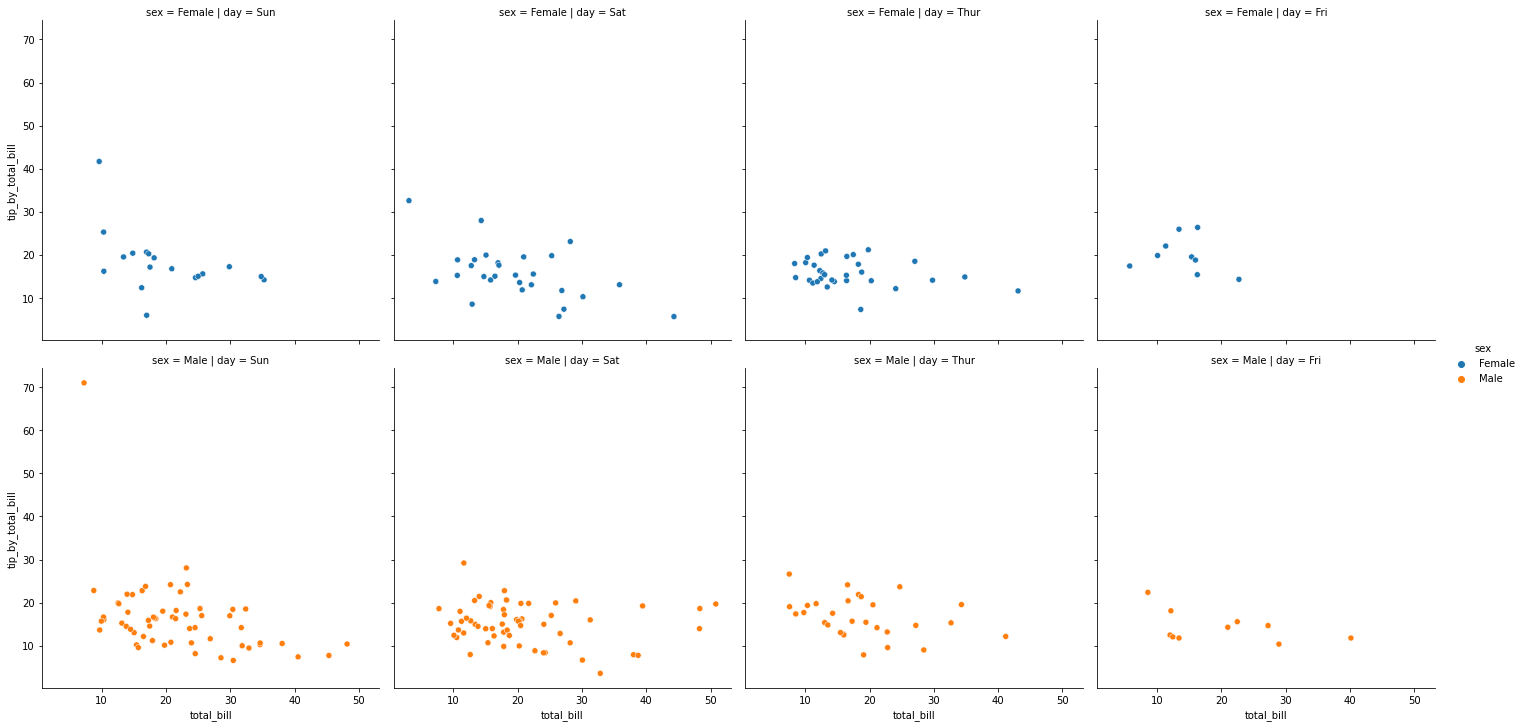

In [59]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip_by_total_bill', hue = 'sex', row = 'sex', col = 'day')

In [51]:
import seaborn

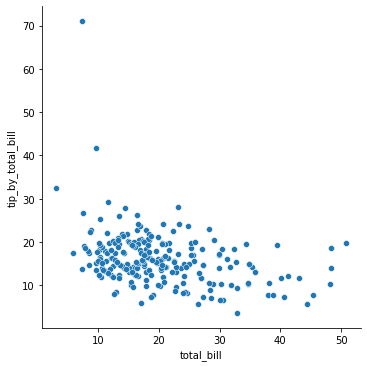

In [53]:
seaborn.relplot(data=tips, x='total_bill', y='tip_by_total_bill')

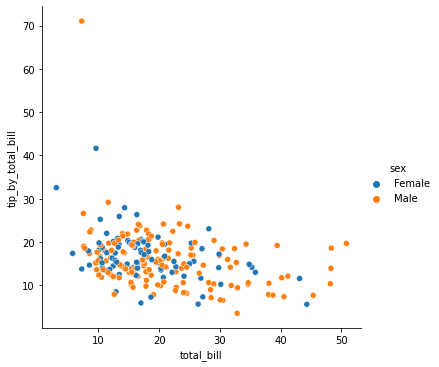

In [54]:
seaborn.relplot(data=tips, x='total_bill', y='tip_by_total_bill', hue='sex')

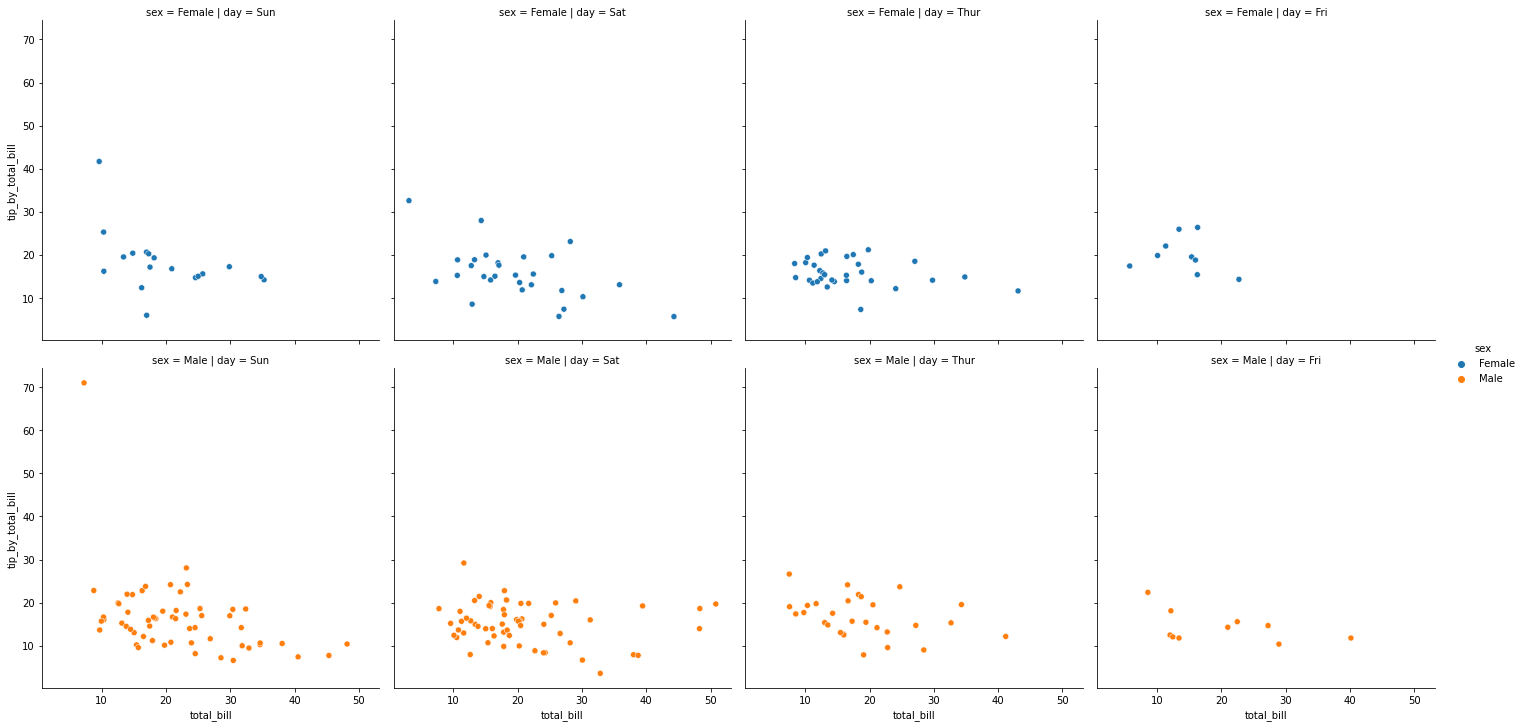

In [59]:
seaborn.relplot(data=tips, x='total_bill', y='tip_by_total_bill', hue='sex', row='sex', col='day')

# Comparing tips between genders

In [62]:
tips.groupby('sex').mean()

,total_bill,tip,size,tip_by_total_bill
sex,,,,
Female,18.056897,2.833448,2.459770,16.649074
Male,20.744076,3.089618,2.630573,15.765055


<AxesSubplot:xlabel='sex', ylabel='tip_by_total_bill'>

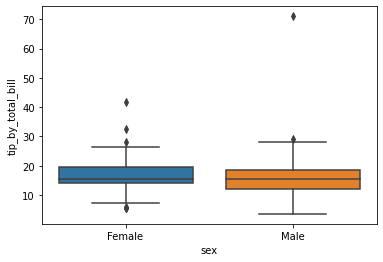

In [63]:
seaborn.boxplot(data=tips, x='sex', y='tip_by_total_bill')

<AxesSubplot:xlabel='day', ylabel='tip_by_total_bill'>

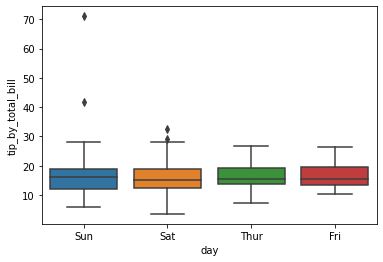

In [64]:
seaborn.boxplot(data=tips, x='day', y='tip_by_total_bill')

<AxesSubplot:xlabel='sex', ylabel='tip_by_total_bill'>

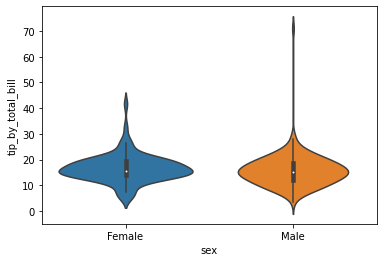

In [67]:
seaborn.violinplot(data=tips, x='sex', y='tip_by_total_bill')

<AxesSubplot:xlabel='smoker', ylabel='tip_by_total_bill'>

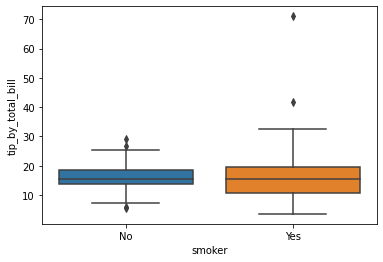

In [69]:
seaborn.boxplot(data=tips, x='smoker', y='tip_by_total_bill')

<AxesSubplot:xlabel='tip_by_total_bill', ylabel='smoker'>

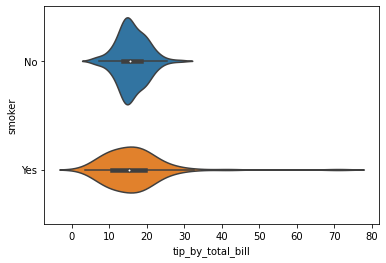

In [71]:
seaborn.violinplot(data=tips, y='smoker', x='tip_by_total_bill')

In [72]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_by_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<AxesSubplot:xlabel='time', ylabel='tip_by_total_bill'>

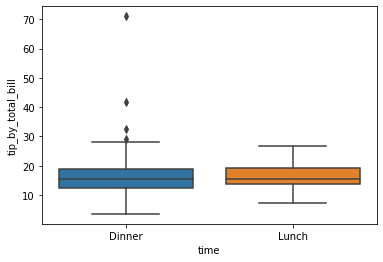

In [73]:
seaborn.boxplot(data=tips, x='time', y='tip_by_total_bill')

In [75]:
tips.groupby('time').mean().round(2)

,total_bill,tip,size,tip_by_total_bill
time,,,,
Dinner,20.80,3.10,2.63,15.95
Lunch,17.17,2.73,2.41,16.41


In [83]:
tips.groupby(['sex','time','day']).mean().round(1)

total_bill  tip  size  tip_by_total_bill
sex    time   day                                           
Female Dinner Fri         14.3  2.8   2.0               19.9
              Sat         19.7  2.8   2.2               15.6
              Sun         19.9  3.4   2.9               18.2
              Thur        18.8  3.0   2.0               16.0
       Lunch  Fri         13.9  2.7   2.2               20.0
              Thur        16.6  2.6   2.5               15.7
Male   Dinner Fri         23.5  3.0   2.3               13.0
              Sat         20.8  3.1   2.6               15.2
              Sun         21.9  3.2   2.8               16.2
       Lunch  Fri         11.4  1.9   1.7               17.4
              Thur        18.7  3.0   2.4               16.5

In [60]:
tips.groupby(['sex', 'time', 'day']).mean().round(2)

total_bill   tip  size  tip_by_total_bill
sex    time   day                                            
Female Dinner Fri        14.31  2.81  2.00              19.91
              Sat        19.68  2.80  2.25              15.65
              Sun        19.87  3.37  2.94              18.16
              Thur       18.78  3.00  2.00              15.97
       Lunch  Fri        13.94  2.74  2.25              19.97
              Thur       16.65  2.56  2.48              15.75
Male   Dinner Fri        23.49  3.03  2.29              13.02
              Sat        20.80  3.08  2.64              15.16
              Sun        21.89  3.22  2.81              16.23
       Lunch  Fri        11.39  1.90  1.67              17.41
              Thur       18.71  2.98  2.43              16.53